<a href="https://colab.research.google.com/github/Modyali21/Spectral-Clustering/blob/main/Spectral_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries and modules I used**

In [1]:
import numpy as np
from scipy.spatial.distance import euclidean
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Compute the RBF between each two points**

In [2]:
def RBF(x, y, gamma):
    return math.exp(-gamma*euclidean(x, y)**2)


1.   **generate the similarity matrix given the points and gamma value using RBF kernel function**
2.   **generate the degree matrix (delta matrix) from the similarity matrix**



In [3]:
def similarity_matrix(points, gamma):
    sim_matrix = [[0 for _ in range(len(points))] for _ in range(len(points))]
    for i in range(len(points)):
        for j in range(len(points)):
            sim_matrix[i][j] = RBF(points[i], points[j], gamma)
    return np.array(sim_matrix)


def degree_matrix(sim_matrix):
    diagonal_elements = np.sum(sim_matrix, axis=1)
    diagonal_matrix = np.diag(diagonal_elements)
    return np.array(diagonal_matrix)

**Generate the similarity matrix using 3-NN by inserting 1 if xi is one of the 3 nearest neighbours of xj and vise versa**

In [6]:
def KNN_similarity_matrix(points, k):
    distances = [[np.linalg.norm(np.array(point1) - np.array(point2))
                for point2 in points] for point1 in points]
    knn_indices = [sorted(range(len(distances[i])), key=lambda j: distances[i][j])[
        1:k + 1] for i in range(len(distances))]
    adjacency_matrix = [[1 if j in knn_indices[i] else 0 for j in range(
        len(points))] for i in range(len(points))]
    for i in range(len(points)):
        for j in knn_indices[i]:
            adjacency_matrix[i][j] = 1
            adjacency_matrix[j][i] = 1

    return adjacency_matrix

**helper function to order the eigen values and accordingly the eigenvectors ascendingly**

In [4]:
def order_eigens(eigen_values, eigen_vectors):
    sorted_indices = np.argsort(eigen_values)
    eigen_values = eigen_values[sorted_indices]
    eigen_vectors = eigen_vectors[:, sorted_indices]
    return eigen_values, eigen_vectors


1.   compute the top 3 normalized cut eigenvectors (U eigen vectors)
2.   the second function is used to normalize U (generate Y vectors to be plotted)



In [10]:
def normalized_cut(sim_matrix, degree_matrix, k):
    print(np.array(sim_matrix).shape)
    laplasian = degree_matrix - sim_matrix
    eigen_values, eigen_vectors = np.linalg.eigh(
        np.linalg.inv(degree_matrix).dot(laplasian))
    eigen_values, eigen_vectors = order_eigens(eigen_values, eigen_vectors)
    U = eigen_vectors[:, :k]
    return U


def normalize(U):
    normalized_arr = np.linalg.norm(U, axis=1, keepdims=True)
    normalized_arr = U / normalized_arr
    return normalized_arr

**-Compute the kmeans with plotting each cluster with a color**

**-Another function to plot Y without using kmeans**

In [15]:
def kmeans_plot(Y, k,gamma):

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(Y)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for each cluster
    for cluster_id in range(k):
        cluster_points = Y[labels == cluster_id]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1],
                   cluster_points[:, 2], label=f'Cluster {cluster_id + 1}')

    # Plot centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
               c='black', marker='x', s=200, label='Centroids')

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title(f"for gamma = {gamma}")
    ax.legend()

    plt.show()

def plot(Y,gamma):

  # Create a 3D scatter plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  # Scatter plot
  ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2])

  # Set labels for each axis
  ax.set_xlabel('X-axis')
  ax.set_ylabel('Y-axis')
  ax.set_zlabel('Z-axis')
  ax.set_title(f"for gamma = {gamma}")
  # Show the plot
  plt.show()


**Run the code using RBF with different values of gamma[0.01,0.1,1,10]**

(24, 24)


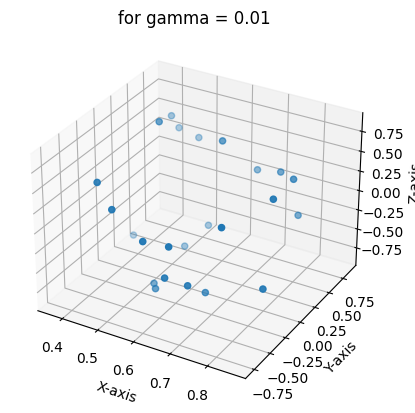

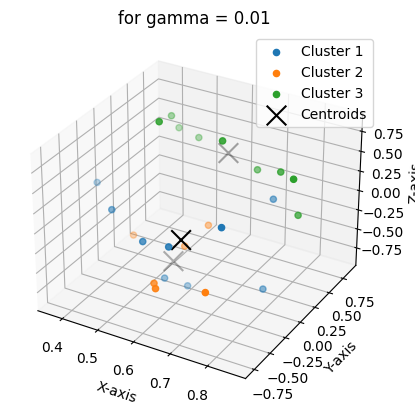

(24, 24)


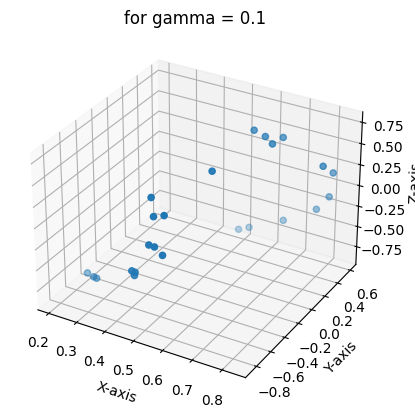

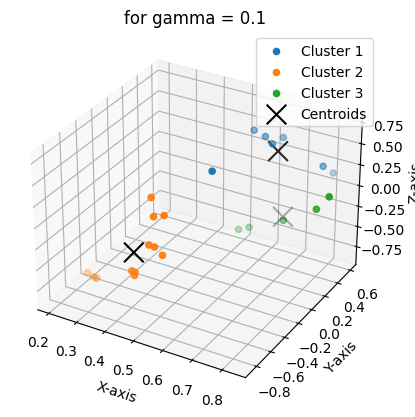

(24, 24)


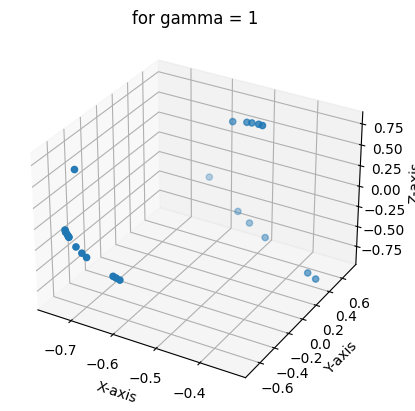

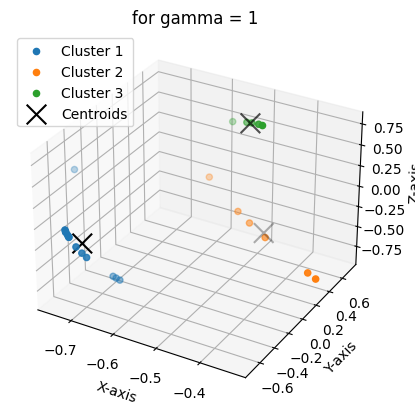

(24, 24)


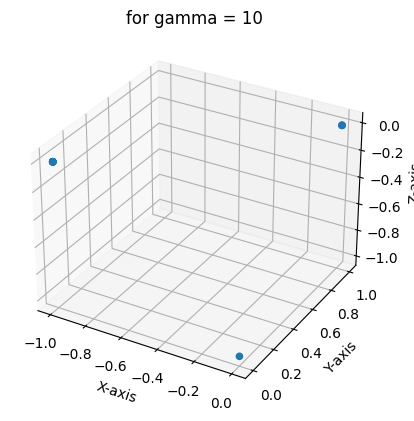

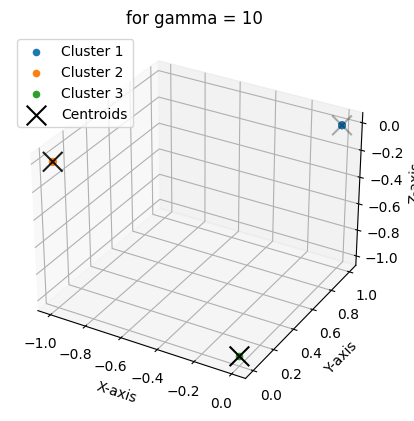

In [16]:
points = [(2, 4), (3, 3), (3, 4), (5, 4),
          (5, 6), (5, 8), (6, 4), (6, 5), (6, 7), (7, 3),
          (7, 4), (8, 2), (9, 4), (10, 6), (10, 7), (10, 8),
          (11, 5), (11, 8), (12, 7), (13, 6), (13, 7), (14, 6),
          (15, 4), (15, 5)]
gammas = [0.01,0.1,1,10]
for gamma in gammas :
  sim_matrix = similarity_matrix(points, gamma)
  # sim_matrix2 = KNN_similarity_matrix(points,3)
  U = normalized_cut(sim_matrix, degree_matrix(sim_matrix), 3)
  # U2 = normalized_cut(sim_matrix2,degree_matrix(sim_matrix2),3)
  Y = normalize(U)
  # Y2 = normalize(U2)
  plot(Y,gamma)
  kmeans_plot(Y, 3, gamma)

**Run the code with 3-NN with plotting**

(24, 24)


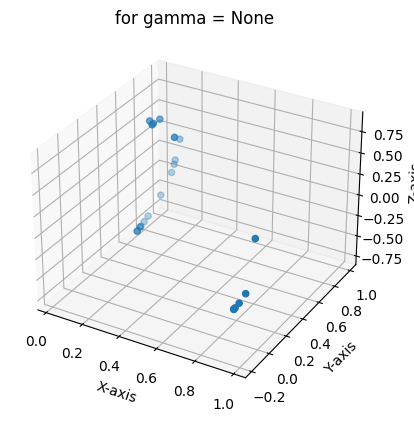

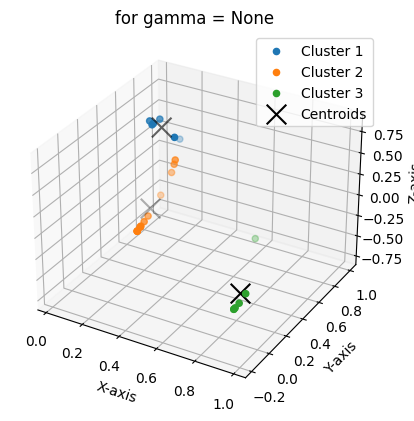

In [21]:
points = [(2, 4), (3, 3), (3, 4), (5, 4),
          (5, 6), (5, 8), (6, 4), (6, 5), (6, 7), (7, 3),
          (7, 4), (8, 2), (9, 4), (10, 6), (10, 7), (10, 8),
          (11, 5), (11, 8), (12, 7), (13, 6), (13, 7), (14, 6),
          (15, 4), (15, 5)]
# sim_matrix = similarity_matrix(points, gamma)
sim_matrix2 = KNN_similarity_matrix(points,3)
# U = normalized_cut(sim_matrix, degree_matrix(sim_matrix), 3)
U2 = normalized_cut(sim_matrix2,degree_matrix(sim_matrix2),3)
# Y = normalize(U)
Y2 = normalize(U2)
plot(Y2,None)
kmeans_plot(Y2, 3,None)

**using the different values of gamma [0.01,0.1,1,10]**